In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("D:/Downloads/TATASTEEL.NS.csv")

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-01,131.000000,134.089996,130.544998,131.710007,58.547070,55321590
1,2022-04-04,131.710007,135.399994,131.445007,134.190002,59.649464,69670320
2,2022-04-05,134.845001,135.800003,132.925003,134.490005,59.782822,63296420
3,2022-04-06,135.000000,138.669998,134.679993,137.074997,60.931889,114097540
4,2022-04-07,137.699997,138.100006,134.100006,134.949997,59.987289,55650640


In [5]:
ticker = yf.Ticker('ITC')
df = ticker.history(period="5y")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2018-05-18 00:00:00-04:00,16000.000000,16100.000000,15400.000000,16100.000000,30500,0.0,0.0,0.0
2018-05-21 00:00:00-04:00,27.442600,28.886999,27.357700,27.952400,112656,0.0,0.0,0.0
2018-05-22 00:00:00-04:00,28.632099,29.226801,27.782499,27.952400,201966,0.0,0.0,0.0
2018-05-23 00:00:00-04:00,28.122299,28.547199,27.612600,27.697500,111986,0.0,0.0,0.0
2018-05-24 00:00:00-04:00,28.037399,28.972000,27.612600,28.802000,218794,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-02-24 00:00:00-05:00,34.799999,35.500000,34.000000,34.200001,282275,0.0,0.0,0.0
2022-02-25 00:00:00-05:00,2.860000,2.860000,2.840000,2.840000,0,0.0,0.0,0.0
2022-02-28 00:00:00-05:00,2.840000,2.860000,2.840000,2.860000,0,0.0,0.0,0.0


In [6]:
ticker = yf.Ticker('TATASTEEL')
bdf = ticker.history(period="5y")
bdf

TATASTEEL: No data found, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [7]:
data['SMA']=0
for i in range(len(data)-4):
    data['SMA'][i+4]= data.loc[i:i+5,'Adj Close'].mean()

C:\Users\ashut\AppData\Local\Temp\ipykernel_20684\2443871547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA'][i+4]= data.loc[i:i+5,'Adj Close'].mean()


In [8]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,SMA
0,2022-04-01,131.000000,134.089996,130.544998,131.710007,58.547070,55321590,0.000000
1,2022-04-04,131.710007,135.399994,131.445007,134.190002,59.649464,69670320,0.000000
2,2022-04-05,134.845001,135.800003,132.925003,134.490005,59.782822,63296420,0.000000
3,2022-04-06,135.000000,138.669998,134.679993,137.074997,60.931889,114097540,0.000000
4,2022-04-07,137.699997,138.100006,134.100006,134.949997,59.987289,55650640,59.971737
...,...,...,...,...,...,...,...,...
57,2022-06-24,85.000000,86.474998,84.464996,85.285004,85.285004,85433810,85.771667
58,2022-06-27,87.050003,87.885002,86.305000,86.785004,86.785004,72814730,86.063334
59,2022-06-28,86.599998,88.440002,86.040001,87.889999,87.889999,84647330,86.010001
60,2022-06-29,87.000000,88.879997,86.849998,88.160004,88.160004,72318470,86.492502


<AxesSubplot:title={'center':'sma'}>

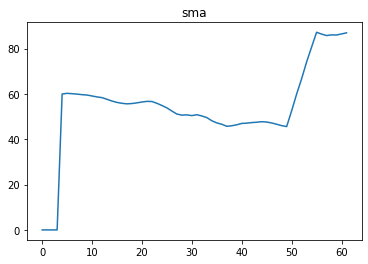

In [9]:
data['SMA'].plot(title='sma')

In [10]:
s = 2
t = 5
data['EMA']=0
for i in range(len(data)-4):
    data['EMA'][i+4]=(data['EMA'][i+3]*(1-(s/(1+t))))+(data['Adj Close'][i+4]*(s/(1+t)))

C:\Users\ashut\AppData\Local\Temp\ipykernel_20684\2779913675.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EMA'][i+4]=(data['EMA'][i+3]*(1-(s/(1+t))))+(data['Adj Close'][i+4]*(s/(1+t)))


In [11]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA
0,2022-04-01,131.000000,134.089996,130.544998,131.710007,58.547070,55321590,0.000000,0.000000
1,2022-04-04,131.710007,135.399994,131.445007,134.190002,59.649464,69670320,0.000000,0.000000
2,2022-04-05,134.845001,135.800003,132.925003,134.490005,59.782822,63296420,0.000000,0.000000
3,2022-04-06,135.000000,138.669998,134.679993,137.074997,60.931889,114097540,0.000000,0.000000
4,2022-04-07,137.699997,138.100006,134.100006,134.949997,59.987289,55650640,59.971737,19.995763
...,...,...,...,...,...,...,...,...,...
57,2022-06-24,85.000000,86.474998,84.464996,85.285004,85.285004,85433810,85.771667,83.215061
58,2022-06-27,87.050003,87.885002,86.305000,86.785004,86.785004,72814730,86.063334,84.405042
59,2022-06-28,86.599998,88.440002,86.040001,87.889999,87.889999,84647330,86.010001,85.566694
60,2022-06-29,87.000000,88.879997,86.849998,88.160004,88.160004,72318470,86.492502,86.431131


<AxesSubplot:title={'center':'ema'}>

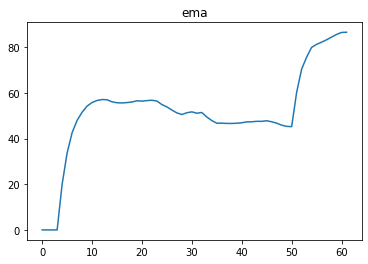

In [12]:
data['EMA'].plot(title='ema')

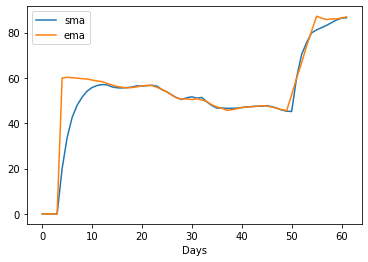

In [18]:
plt.plot(data['EMA'],label='sma')
plt.plot(data['SMA'],label='ema')
plt.xlabel('Days')
plt.legend()
plt.show()